In [1]:
import numpy as np
import h5py as h5py

import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

import yt
import unyt

import os

/home/nina/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/nina/.config/yt/ytrc is deprecated in favor of /home/nina/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


N: number of cores  
n: number of grid elements in 1D  
L: box size

**Strong scaling test**: Fixed 256 x 256 grid (i.e., fixed number of particles is $6.5536 \times 10^4$), L = 1.0 cm, doubling number of cores.
* N = 1:  t = 03:18:30    (256^2 / 1  = 65536 particles/core)  
* N = 2:  t = 01:54:45    (256^2 / 2  = 32768 particles/core)  
* N = 4:  t = 01:00:22    (256^2 / 4  = 16384 particles/core)  
* N = 8:  t = 00:34:02    (256^2 / 8  = 8192 particles/core)  
* N = 16: t = 00:19:54    (256^2 / 16 = 4096 particles/core)  
* N = 32: t = 00:13:10    (256^2 / 32 = 2048 particles/core)  
* N = 64: t = 00:10:27    (256^2 / 64 = 1024 particles/core)  

**Weak scaling test (increasing resolution)**: Doubling number of grid cells in 1D and number of cores; L = 1.0 cm.  
* N = 4, 64 x 64:        t = 00:01:19    (64^2   / 4  = 1024 particles/core)   
* N = 8, 128 x 128:      t = 00:04:51    (128^2  / 8  = 2048 particles/core)    
* N = 16, 256 x 256:     t = 00:19:56    (256^2  / 16 = 4096 particles/core)  
* N = 32, 512 x 512:     t = 01:31:55    (512^2  / 32 = 8192 particles/core)   
* N = 64, 1024 x 1024:   t = 07:59:12    (1024^2 / 64 = 16384 particles/core)  

**Weak scaling test (increasing problem size)**: Doubling box length, number of grid cells in 1D, and number of cores (each particle has mass $6.10352 \times 10^{-5}$ g).  
* L = 1.0,    n = 128,    N = 2,       t = 00:14:46    (16384 / 2 = 8192 particles/core)
* L = 2.0,    n = 256,    N = 8,       t = 00:14:50    (65536 / 8 = 8192 particles/core)
* L = 4.0,    n = 512,    N = 32,      t = 00:19:01    (262144 / 32 = 8192 particles/core)
* L = 8.0,    n = 1024,   N = 128,     t = 00:29:40    (1048576 / 128 = 8192 particles/core)
* L = 16.0,   n = 2048,   N = 512,     t = 00:38:12    (4194304 / 512 = 8192 particles/core)

In [2]:
# Strong scaling test.
N_vals_s = np.asarray([1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0])
t_vals_s = np.asarray([11910.0, 6885.0, 3622.0, 2042.0, 1194.0, 790.0, 627.0])
p_vals_s = ['6.6e4', '3.3e4', '1.6e4', '8.2e3', '4.1e3', '2.0e3', '1.0e3']  # particles/core

# Weak scaling test: increase resolution.
N_vals_w1 = np.asarray([4.0, 8.0, 16.0, 32.0, 64.0])
t_vals_w1 = np.asarray([79.0, 291.0, 1196.0, 5515.0, 28752.0])
p_vals_w1 = ['1.0e3', '2.0e3', '4.1e3', '8.2e3', '1.6e4']  # partcles/core

# Weak scaling test: increase problem size.
N_vals_w2 = np.asarray([2.0, 8.0, 32.0, 128.0, 512.0])
t_vals_w2 = np.asarray([886.0, 890.0, 1141.0, 1780.0, 2292.0])
p_vals_w2 = ['1.6e4', '6.6e4', '2.6e5', '1.0e6', '4.2e6']  # total number of particles

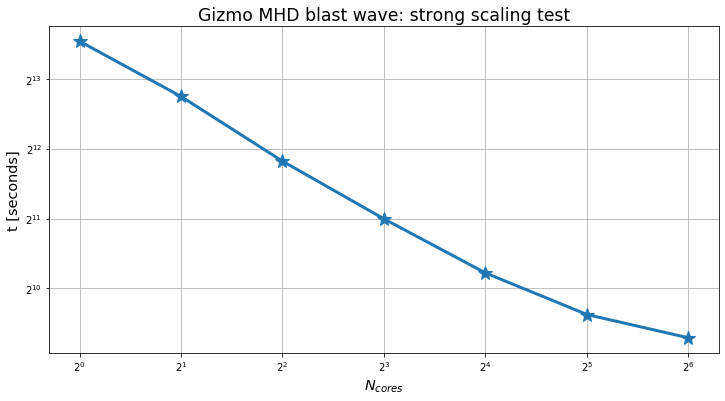

In [3]:
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_s, t_vals_s, '-*', linewidth=3, markersize=15)

plt.grid(True)
plt.xlabel('$N_{cores}$', fontsize='x-large')
plt.ylabel('t [seconds]', fontsize='x-large')
plt.title('Gizmo MHD blast wave: strong scaling test', fontsize='xx-large')

# Plot both axes in base 2 for more direct comparison of scaling relation.
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.show()

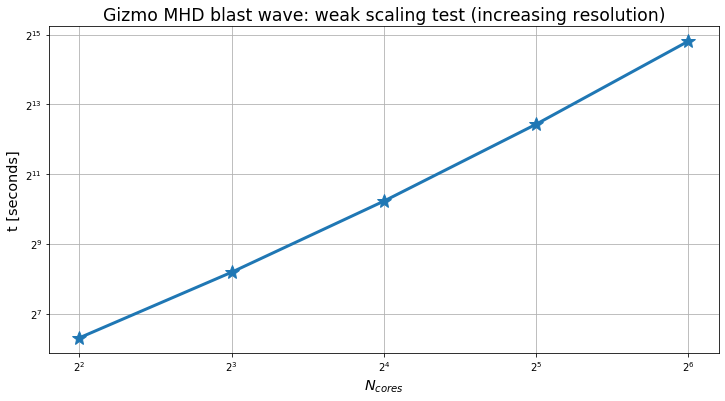

In [4]:
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_w1, t_vals_w1, '-*', linewidth=3, markersize=15)

plt.grid(True)
plt.xlabel('$N_{cores}$', fontsize='x-large')
plt.ylabel('t [seconds]', fontsize='x-large')
plt.title('Gizmo MHD blast wave: weak scaling test (increasing resolution)', fontsize='xx-large')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.show()

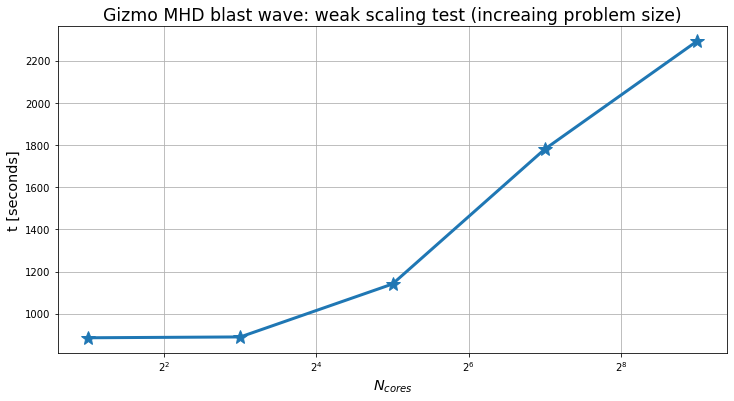

In [5]:
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_w2, t_vals_w2, '-*', linewidth=3, markersize=15)

plt.grid(True)
plt.xlabel('$N_{cores}$', fontsize='x-large')
plt.ylabel('t [seconds]', fontsize='x-large')
plt.title('Gizmo MHD blast wave: weak scaling test (increaing problem size)', fontsize='xx-large')
plt.xscale('log', basex=2)

plt.show()

# Weak scaling test caveats:  

For the strong scaling test, the same IC file from http://www.tapir.caltech.edu/~phopkins/sims/ was used for each run. This IC file has $256 \times 256$ particles and a box length of 1.0 cm.

For the weak scaling test, I modified the `make_IC.py` script to generate IC files for different grid resolutions and box lengths. The qualitative evolution of the density distribution is similar for the ICs generated by `make_mhd_blast_ics.py`, but the differences are significant enough to make me question the reliability of the weak scaling tests results (e.g., the FIRE-2 paper https://arxiv.org/pdf/1702.06148.pdf shows near-ideal weak scaling for fixed problem size, while my results do not).  


Qualitatively, the shape of the blast wave is the same at t = 0.2 s if the box length input to `make_mhd_blast_ics.py` is 1.0 cm. For, e.g., a box length of 2.0 cm, the blast wave shape resembles the result using the Gizmo test problem ICs, but at later times (see plots below).  I initially scaled the radius of the initial low-pressure region in proportion with the box length, but this produced much more spherical blast waves for box lengths larger than 1.0 cm, and this seemed suspicious. So I am not convinced that the ICs used for the weak scaling test (increasing overall problem size) truly increased the problem size in proportion to the number of cores.


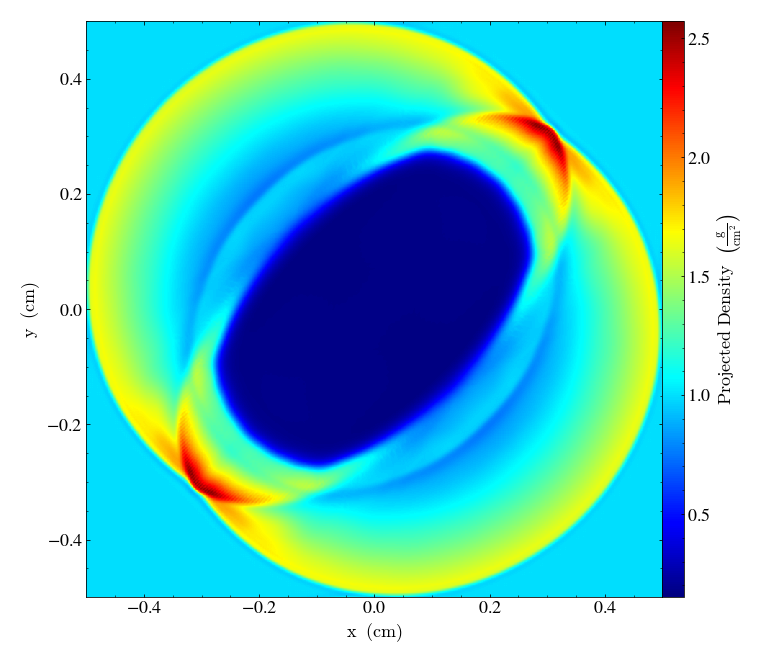


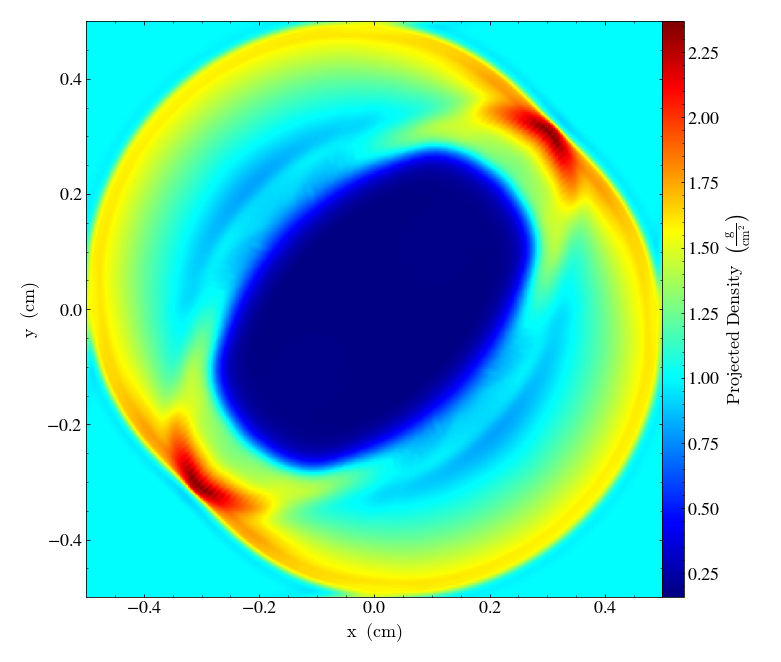


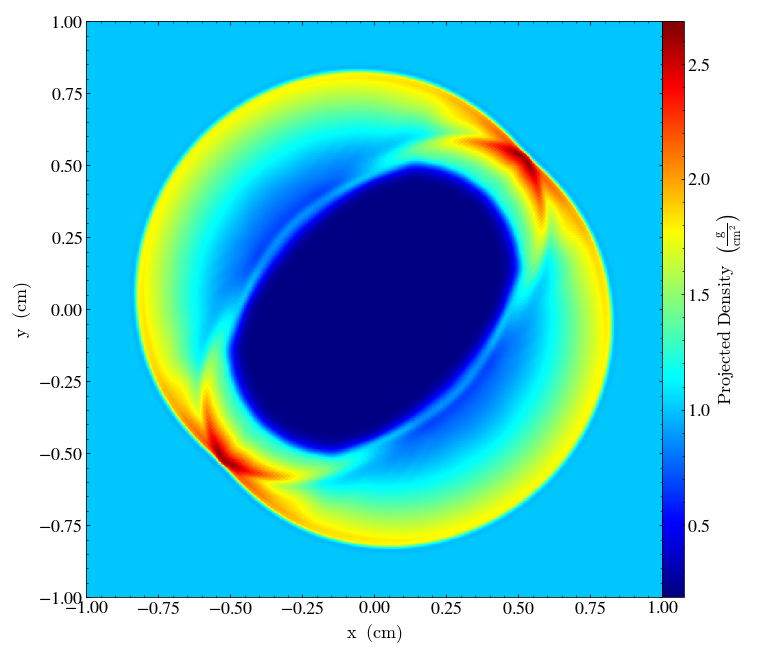


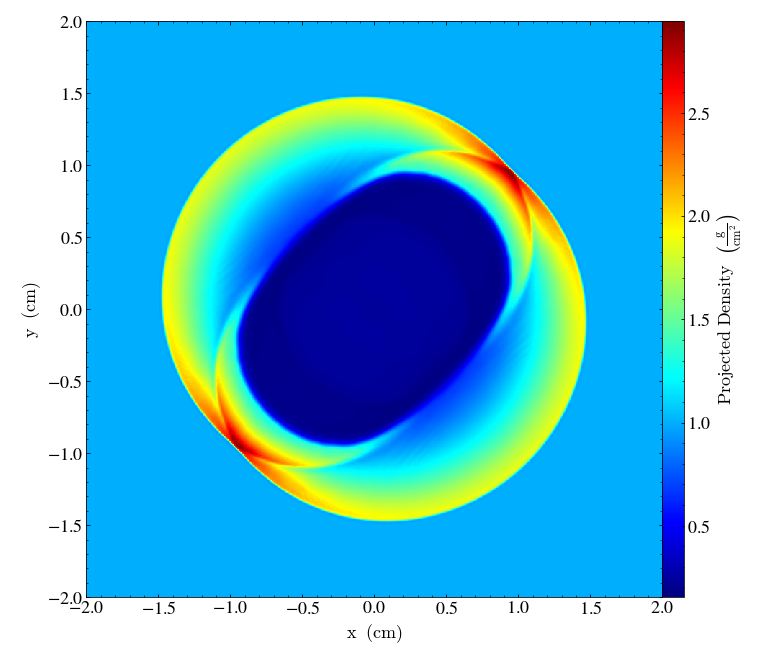

In [6]:
# Density snapshots at t = 0.2 s (test problem ICs vs. make_mhd_blast.py ICs) for the 1.0 cm box, and at 
# t = 0.3 s for the 2.0 cm box, t = 0.5 s for the 4.0 cm box.

yt.set_log_level(50)

unit_base = {'UnitMagneticField_in_gauss':  1.0e4,
             'UnitLength_in_cm'         : 1.0,
             'UnitMass_in_g'            : 1.0,
             'UnitVelocity_in_cm_per_s' : 1.0}

# Using the Gizmo test problem IC file.
fname_0 = '/home/nina/Downloads/scp_transfers/mhd_blast_t_02/strong_n256_N1.hdf5'
ds_0    = yt.load(fname_0, unit_base=unit_base)

# Using the IC file generated by make_mhd_blast_ics.py, t = 0.2 s.
fname_1 = '/home/nina/Downloads/scp_transfers/mhd_blast_n128_v2/snapshot_002.hdf5'
ds_1    = yt.load(fname_1, unit_base=unit_base)

# Using the IC file generated by make_mhd_blast_ics.py, L = 2.0 cm, t = 0.3 s.
fname_2 = '/home/nina/Downloads/scp_transfers/mhd_blast_n256_v2/snapshot_003.hdf5'
ds_2    = yt.load(fname_2, unit_base=unit_base)

# Using the IC file generated by make_mhd_blast_ics.py, L = 4.0 cm, t = 0.5 s.
fname_3 = '/home/nina/Downloads/scp_transfers/mhd_blast_n512_v2/snapshot_005.hdf5'
ds_3    = yt.load(fname_3, unit_base=unit_base)

# Slices have units [M/L^3]; want [M/L^2] in plots.
p_0 = yt.ProjectionPlot(ds_0, "z", ("PartType0", "density"), center=[0.5, 0.5, 0.0])
p_0.set_unit(("PartType0", "density"), "g/cm**2")
p_0.set_cmap(("PartType0", "density"), "Blue-Red")
p_0.set_log(("PartType0", "density"), False)
p_0.show()

# Resolution is halved compared to the Gizmo IC file because the L = 2.0 cm box had a 128x128 grid.
p_1 = yt.ProjectionPlot(ds_1, "z", ("PartType0", "density"), center=[0.0, 0.0, 0.0])
p_1.set_unit(("PartType0", "density"), "g/cm**2")
p_1.set_cmap(("PartType0", "density"), "Blue-Red")
p_1.set_log(("PartType0", "density"), False)
p_1.show()

# Time at which this model most closely resembles the Gizmo ICs t = 0.2 snapshot.
p_2 = yt.ProjectionPlot(ds_2, "z", ("PartType0", "density"), center=[0.0, 0.0, 0.0])
p_2.set_unit(("PartType0", "density"), "g/cm**2")
p_2.set_cmap(("PartType0", "density"), "Blue-Red")
p_2.set_log(("PartType0", "density"), False)
p_2.show()

# Time at which this model most closely resembles the Gizmo ICs t = 0.2 snapshot.
p_3 = yt.ProjectionPlot(ds_3, "z", ("PartType0", "density"), center=[0.0, 0.0, 0.0])
p_3.set_unit(("PartType0", "density"), "g/cm**2")
p_3.set_cmap(("PartType0", "density"), "Blue-Red")
p_3.set_log(("PartType0", "density"), False)
p_3.show()